In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from warnings import filterwarnings
from scipy import stats
filterwarnings("ignore")


In [3]:
df_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [4]:
df_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train = df_train.drop(columns=["Id"])

In [8]:
# Separating Dataset numerical data only
numerical_df = df_train.select_dtypes(np.number)
categorical_df = df_train.select_dtypes(exclude=np.number)

# <font color ="purple">Gathering More Information About Dataset</font>
->> As we can see, on YrSold, and MoSold variables the most sales are done on August, 2009, we can understand  by their quantile values
<br>
->> 1st quartile = q1: 25% of the units will be received in a series ordered from smallest to largest is the highest value.
<br>
->> q2: 50% of the units will receive in a series ordered from smallest to largest is the highest value. / median
<br>
->> q3: 75% of the units will receive in a series ordered from smallest to largest is the highest value.

In [9]:
numerical_df.describe().T.style.background_gradient(cmap="YlOrRd")

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000
BsmtFinSF2,1460.000000,46.549315,161.319273,0.000000,0.000000,0.000000,0.000000,1474.000000


In [10]:
def var_plot(numerical_df,col):
    fig = plt.figure(figsize=(17,6))
    plt.subplot(1,3,1)
    numerical_df[col].hist(bins=40)
    plt.title(f"Distribution of {col}")
    
    plt.subplot(1,3,2)
    stats.probplot(numerical_df[col], dist = "norm", plot = plt)
    plt.ylabel('Quantiles')
    
    plt.subplot(1,3,3)
    sns.boxplot(y=numerical_df[col])
    plt.title("Boxplot")
    plt.show()

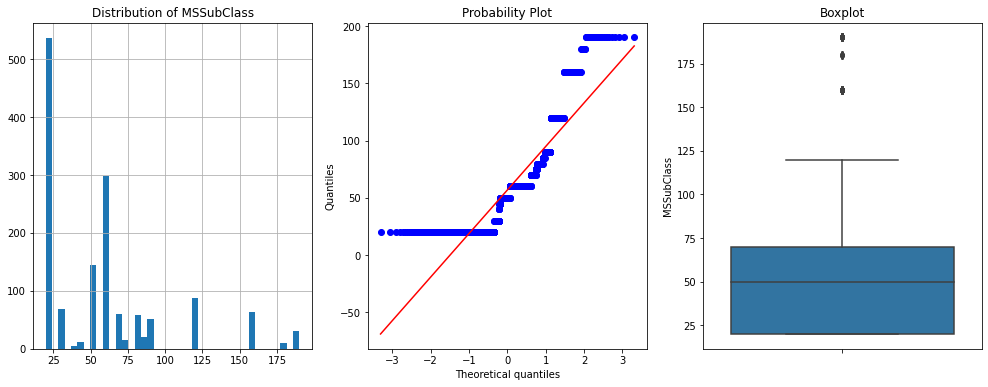

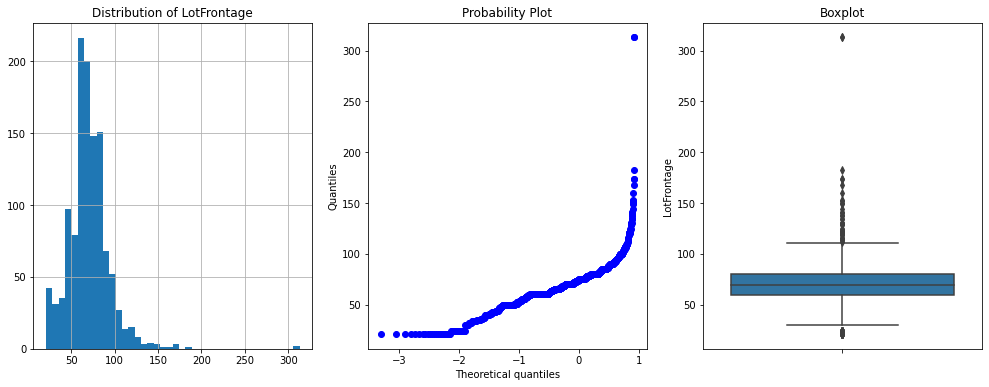

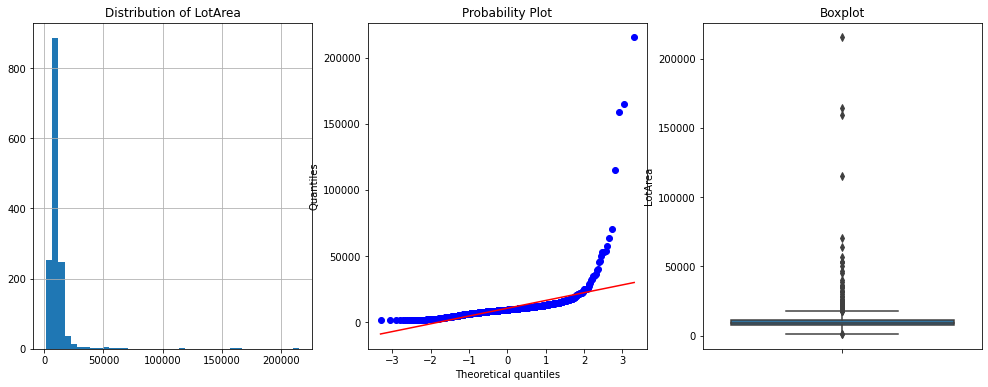

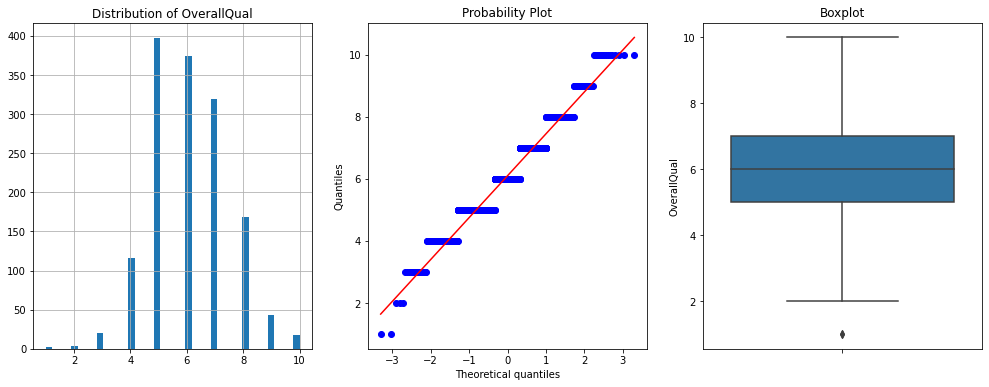

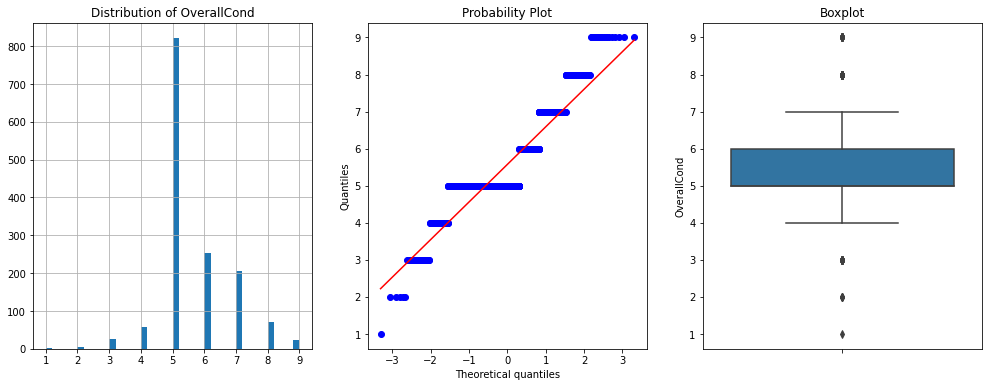

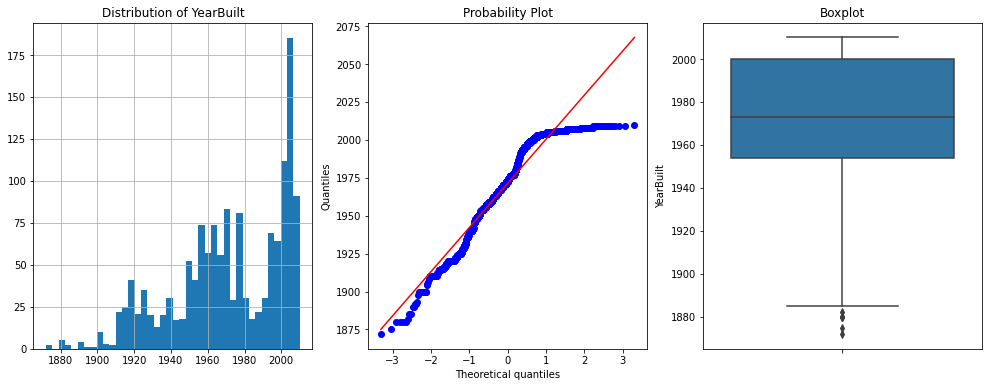

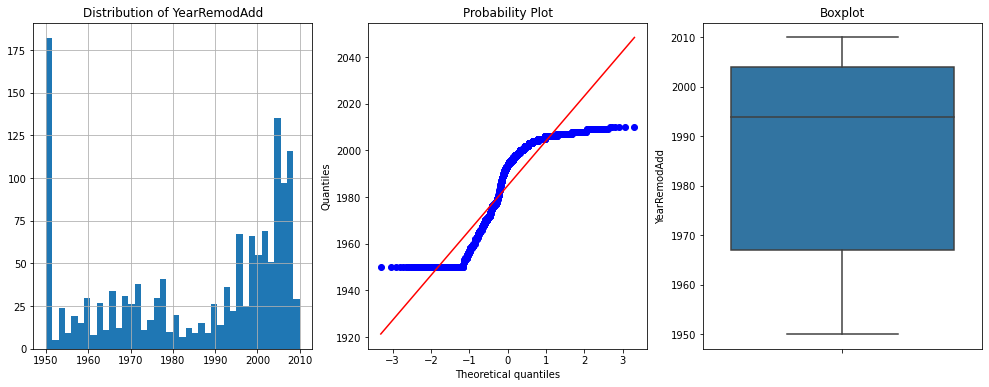

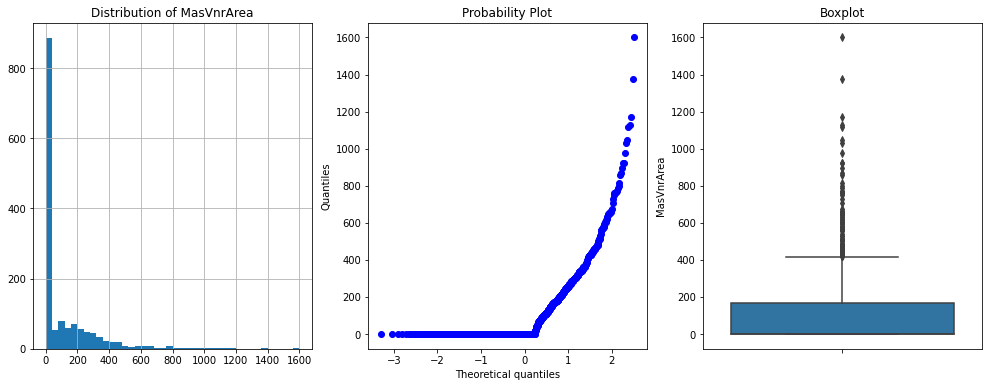

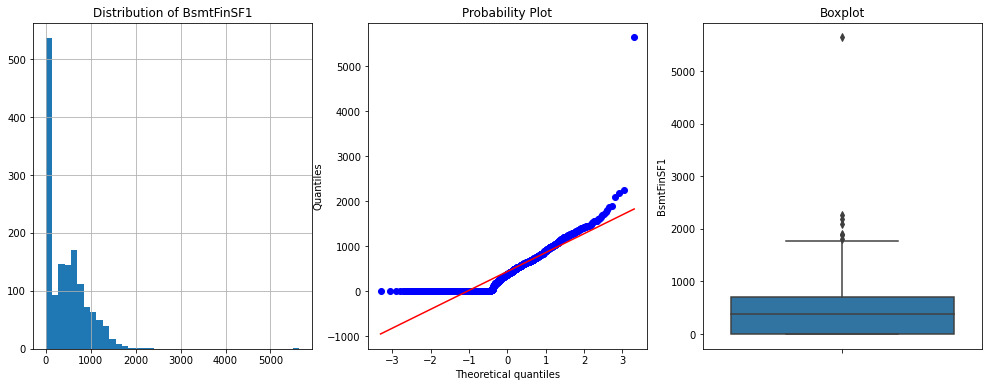

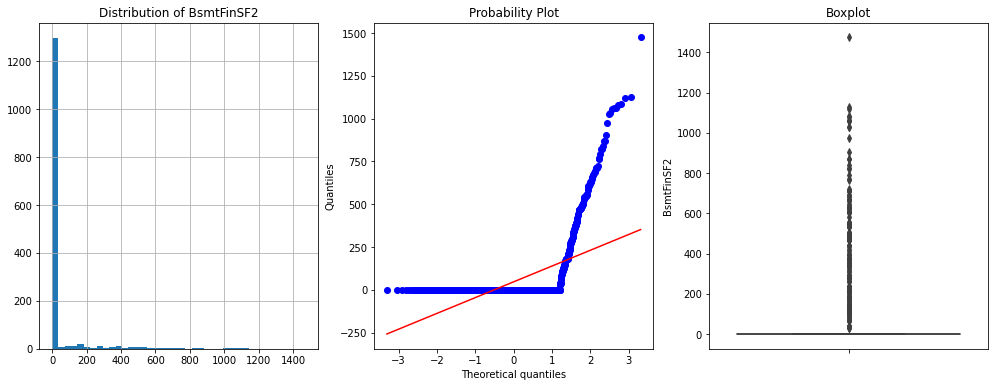

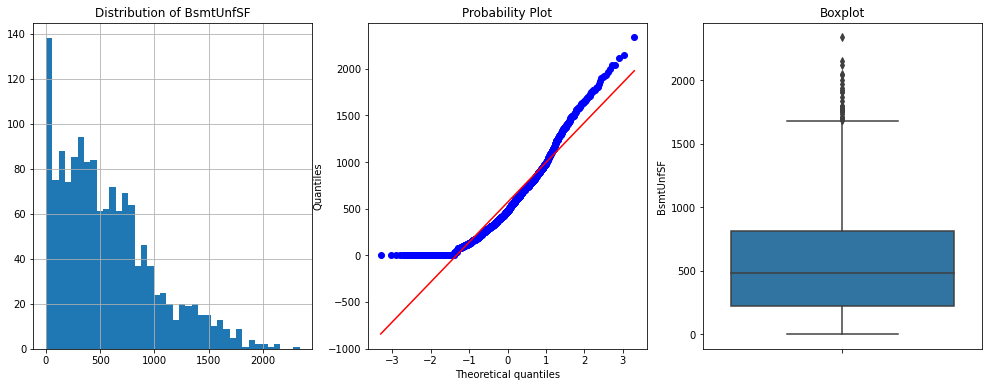

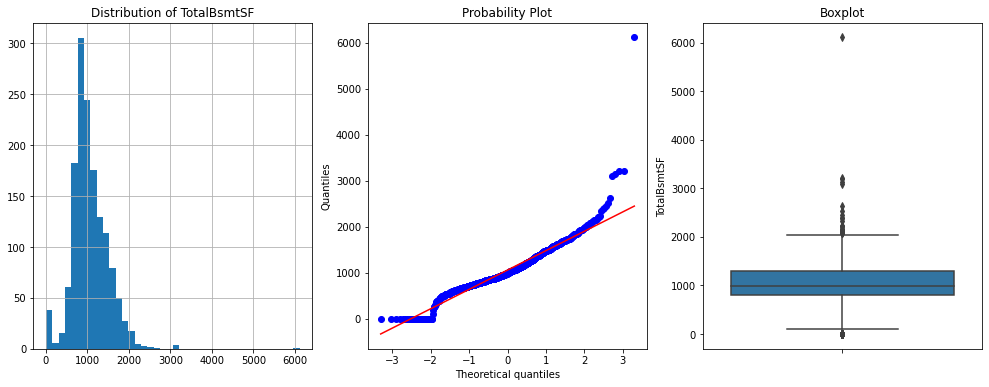

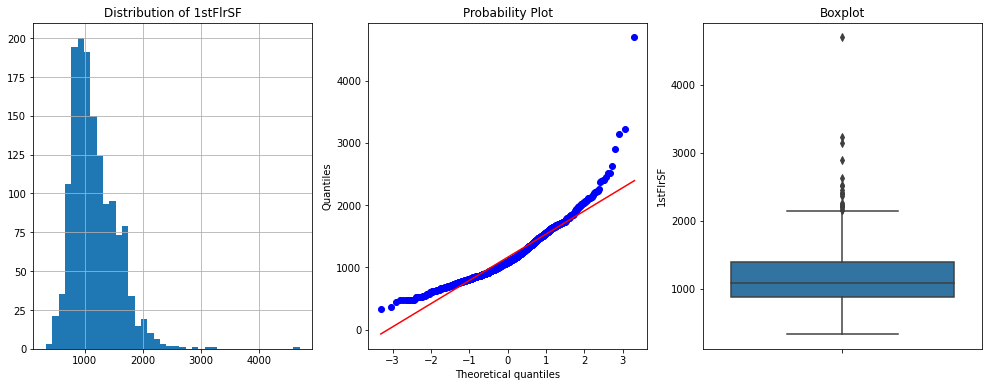

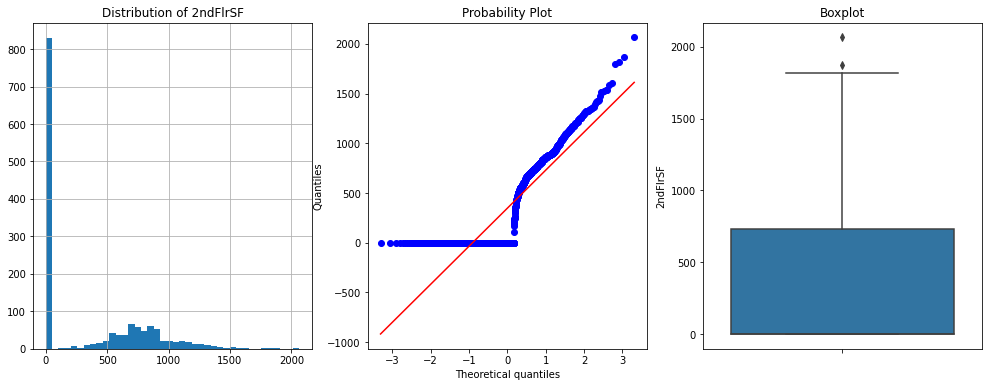

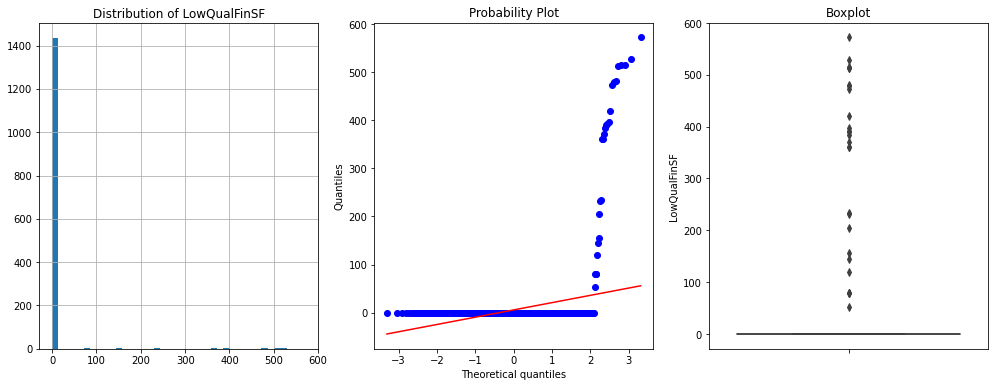

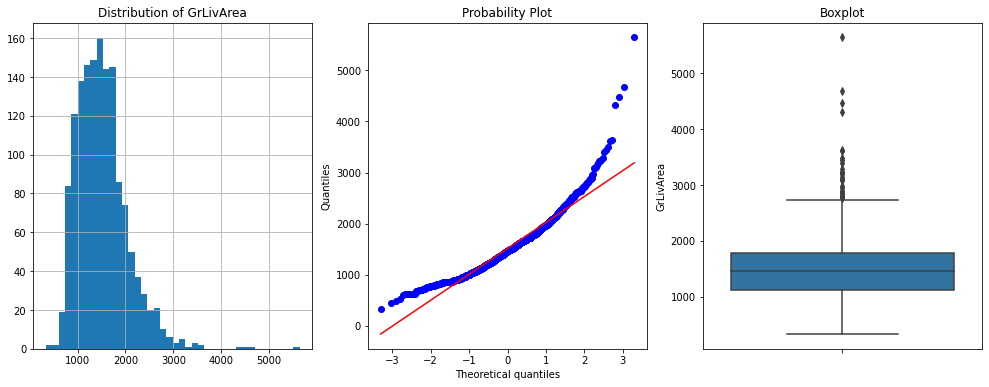

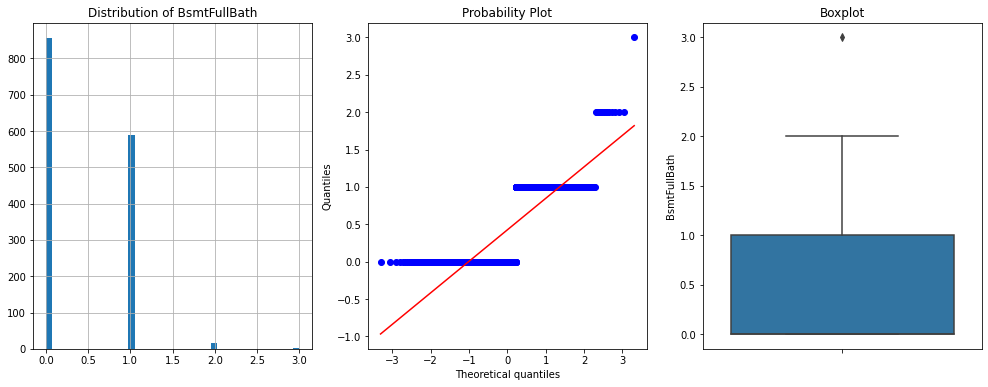

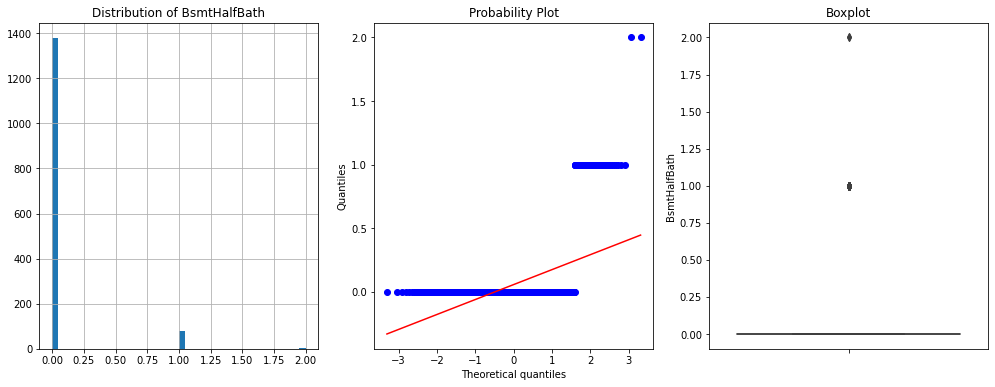

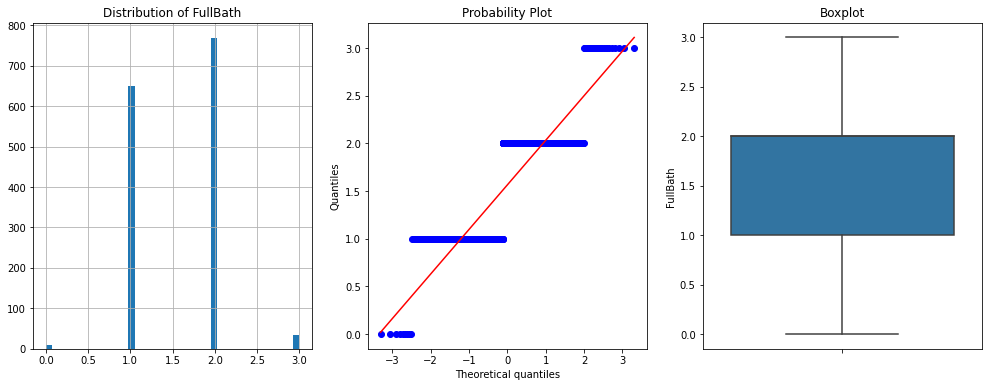

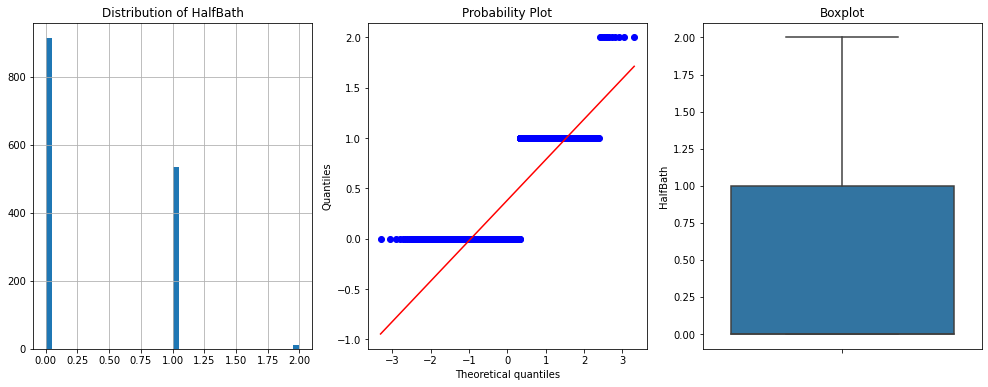

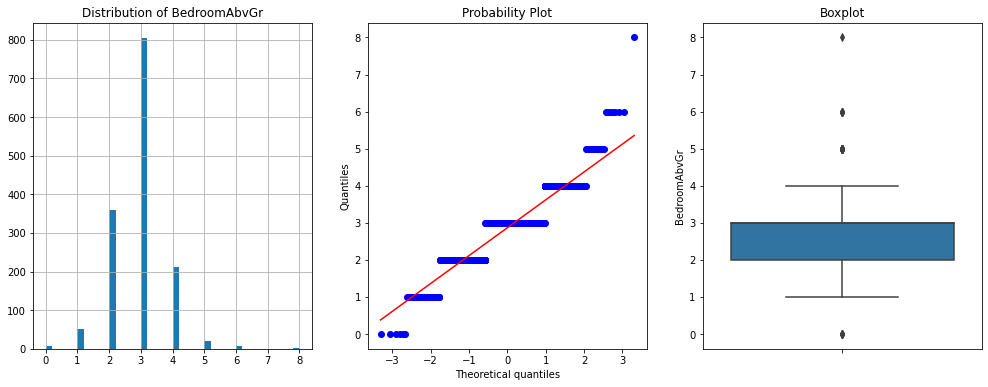

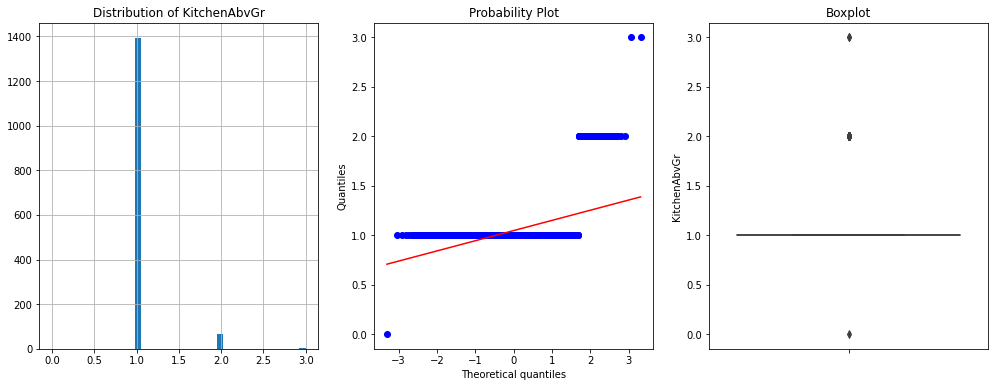

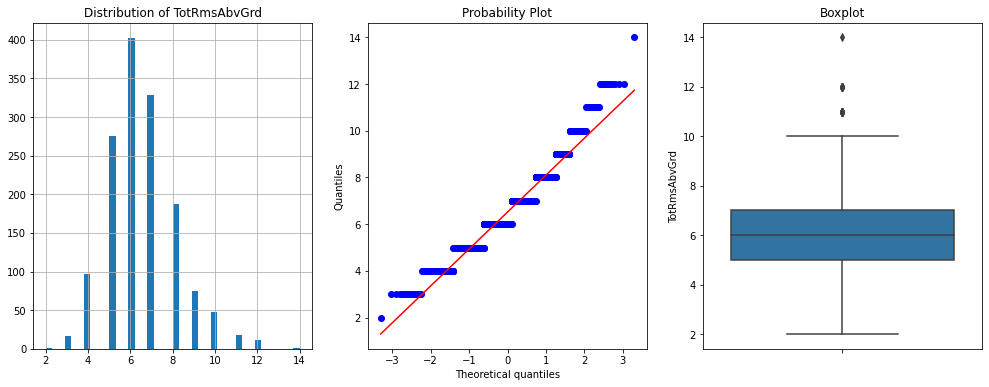

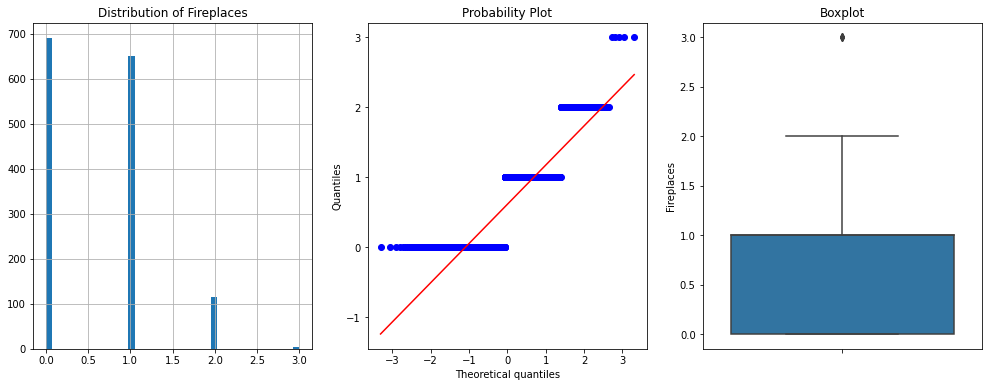

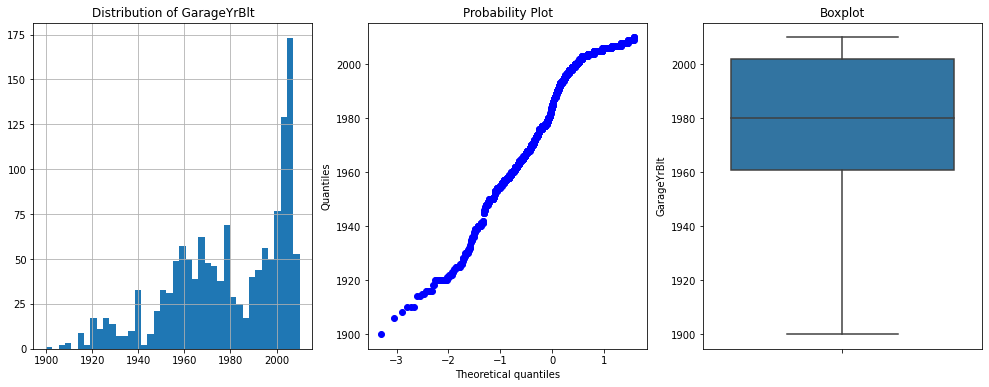

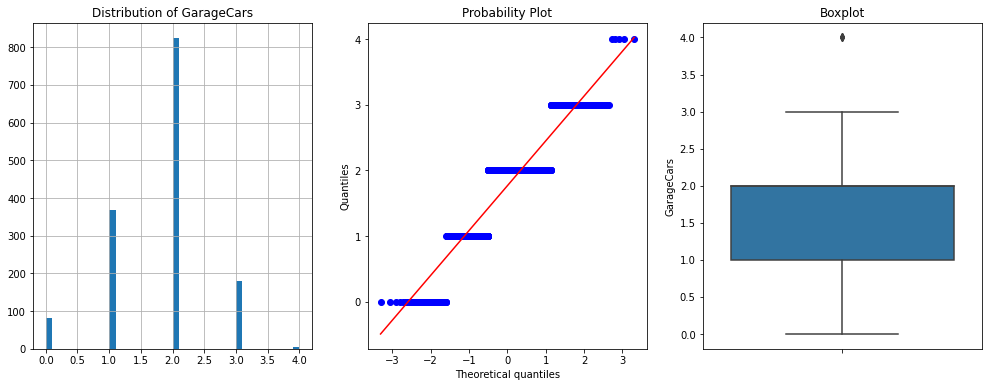

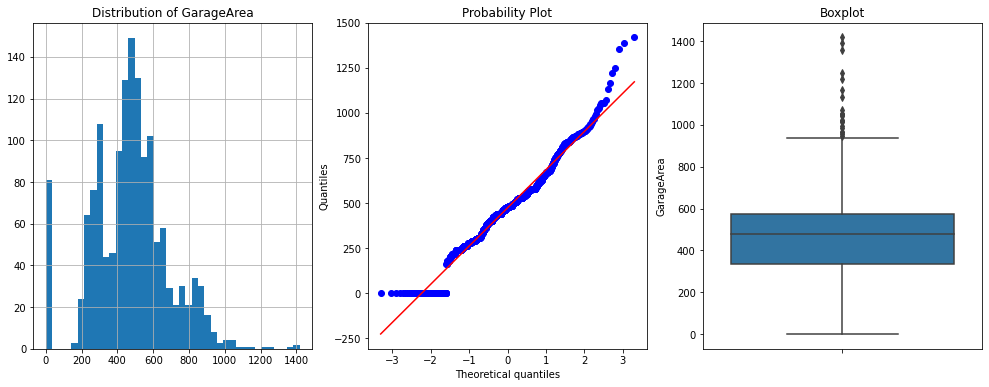

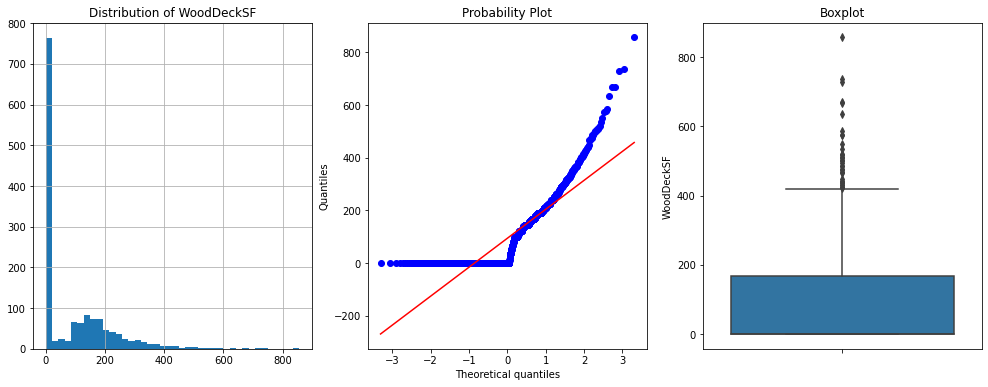

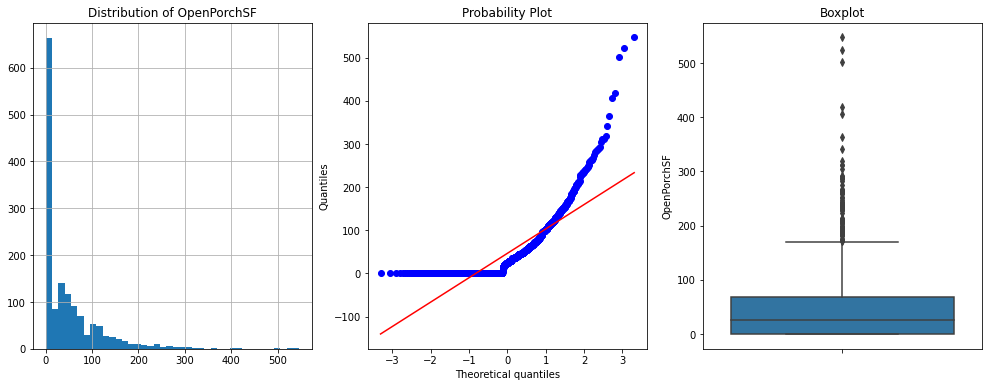

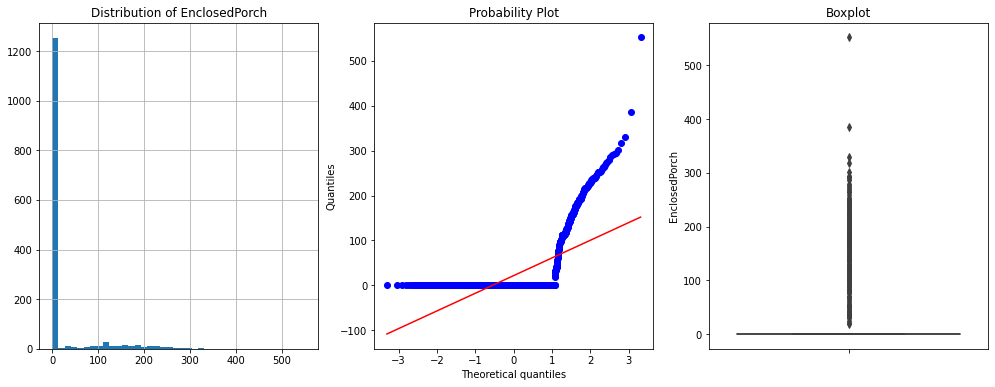

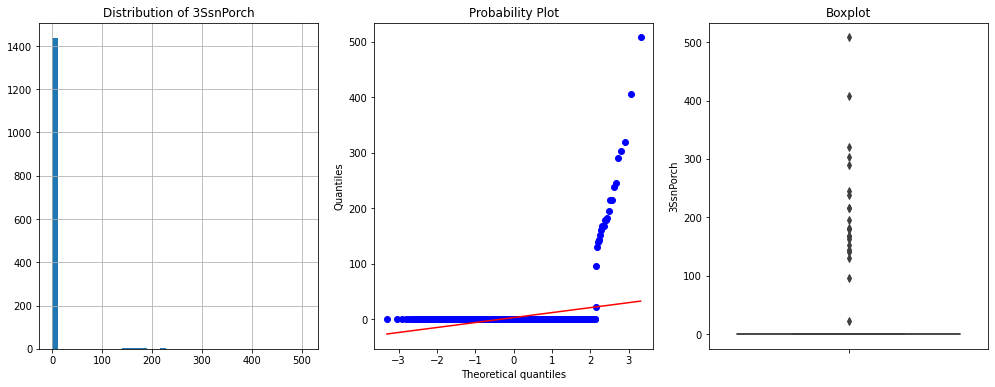

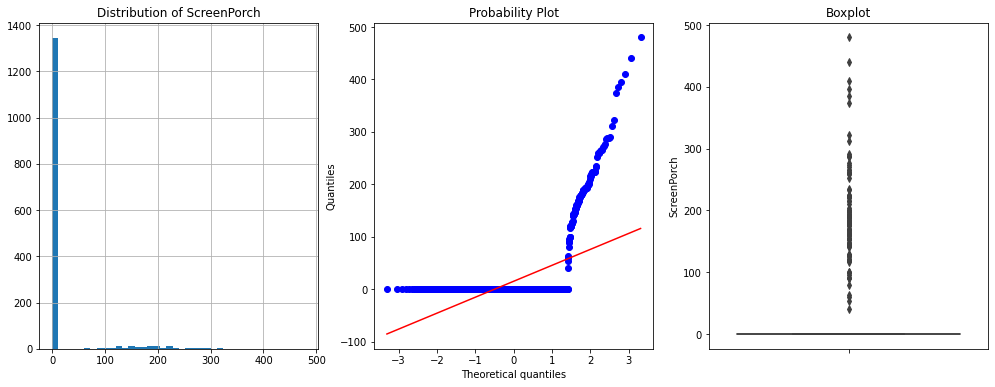

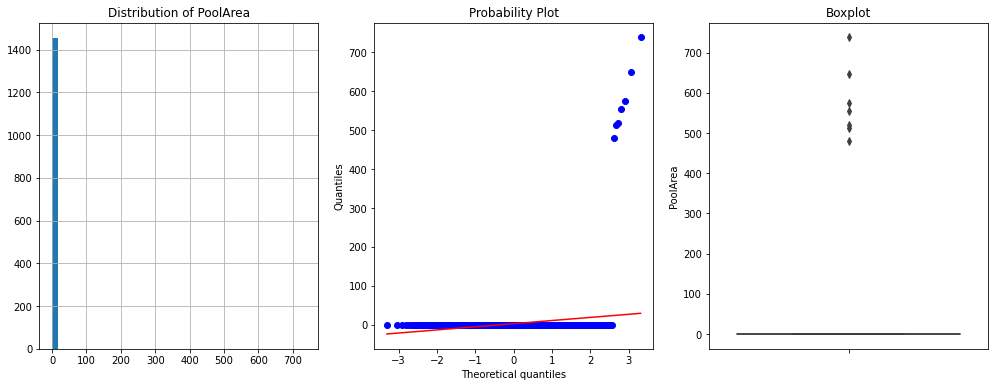

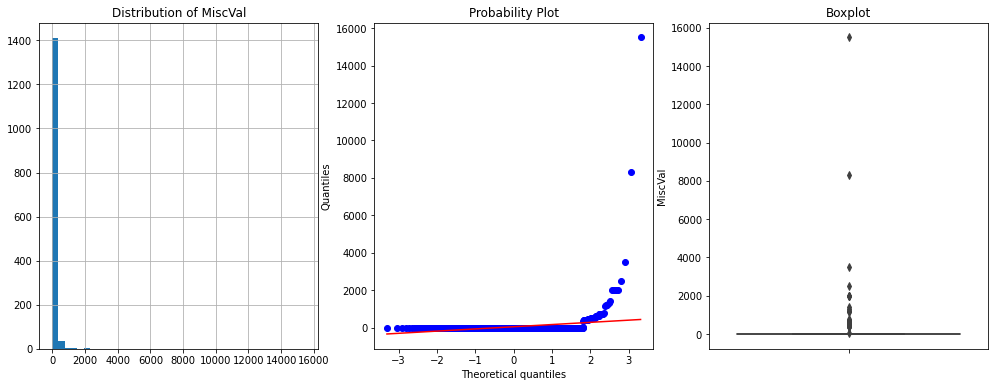

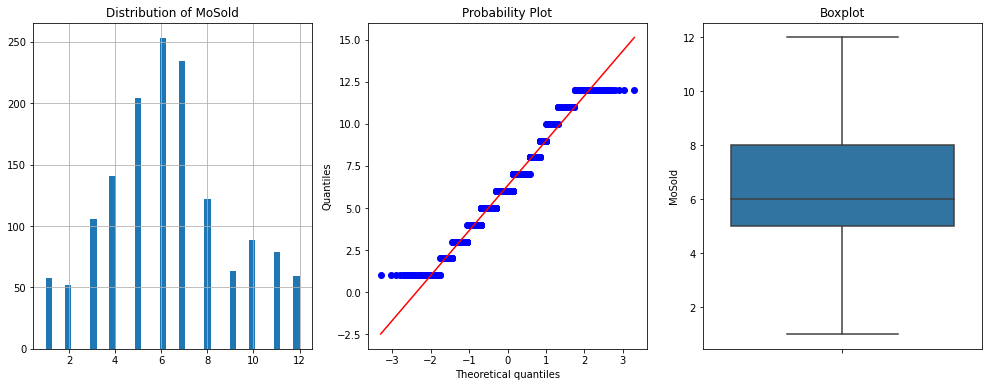

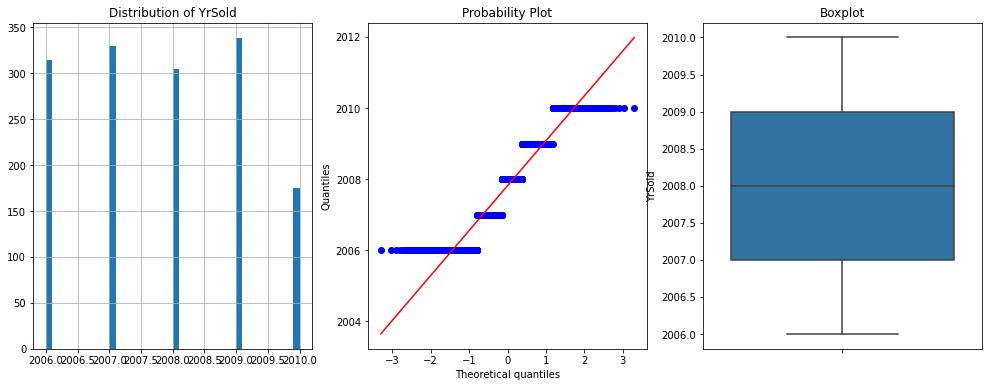

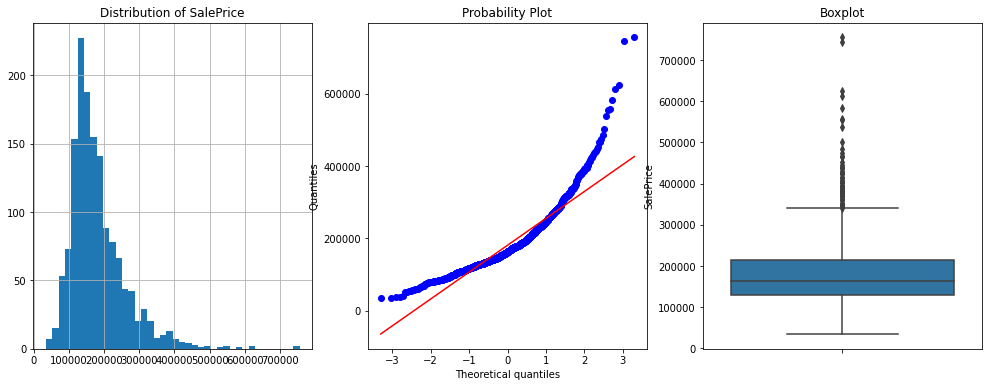

In [11]:
for col in numerical_df:
    var_plot(numerical_df,col)

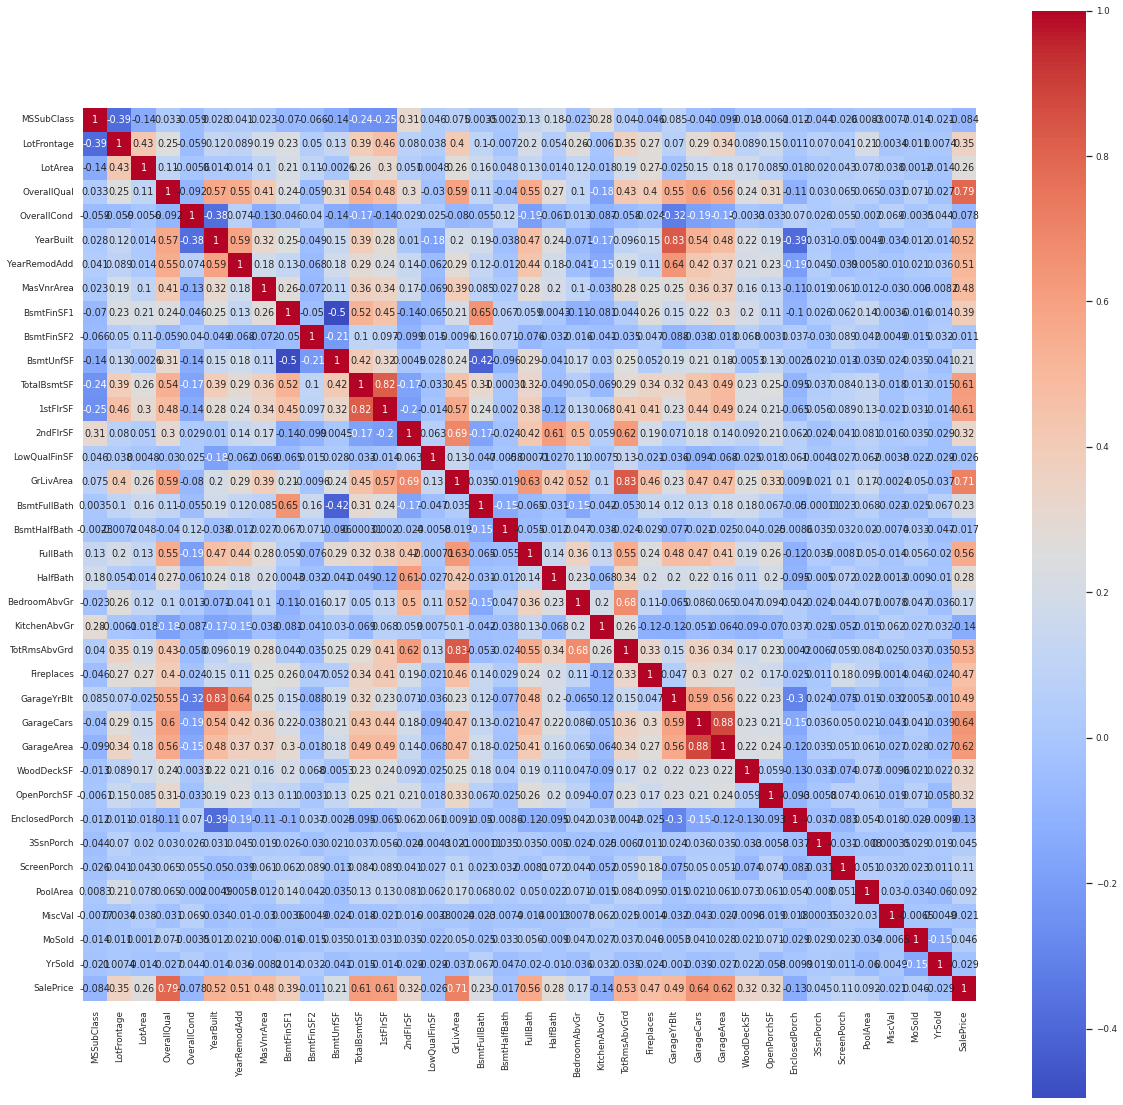

In [12]:
df_train_corr=df_train.corr()
sns.set(font_scale=0.8)
plt.figure(figsize=(20,20))
sns.heatmap(df_train_corr,annot=True,cmap="coolwarm",square=True)
plt.show();

### <font color ="red">As we can see there are too many null values in categorical variables</font>
->> We need to remove columns which have too many non values in categoricals,  my opiniom is that it is better to removing them instead of converting dummy variable, so we take first 5 from here to dropping because they have many NaN values.
<br>
->> Other nan values can be converted to dummy variable

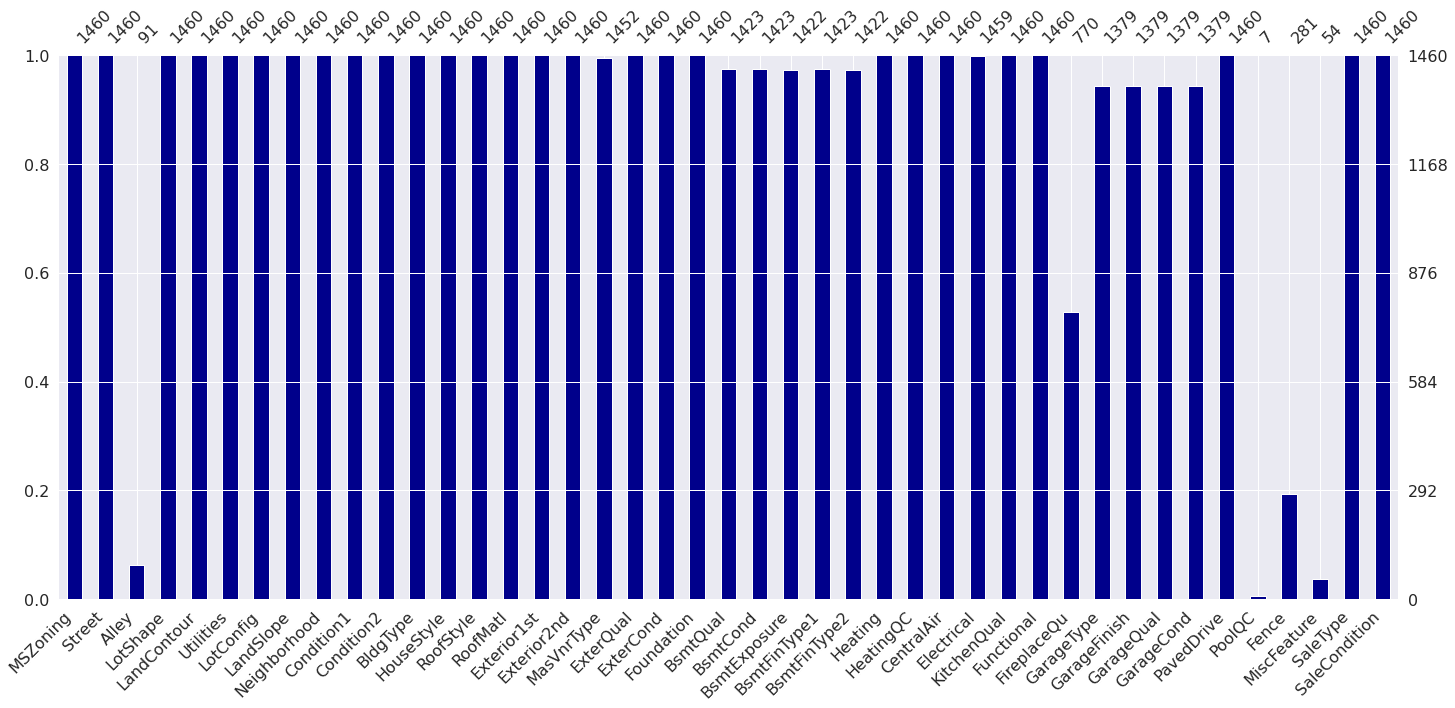

In [13]:
msno.bar(categorical_df,color="darkblue");

### <font color ="red">Determining the columns which have many NaNs</font>

In [14]:
categorical_nans = categorical_df[categorical_df.columns[categorical_df.isna().any()]].isna().sum().sort_values(ascending=False)
categorical_nans

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
dtype: int64

In [15]:
df_train.shape

(1460, 80)

### <font color ="red">Dropping first 5 categorical NaNs</font>

In [16]:
# 
cat_nan_columns = list(categorical_nans[:5].index)
df_train.drop(columns=cat_nan_columns,inplace=True)
df_train.shape

(1460, 75)

### <font color ="red">Time to deal with numerical ones</font>

In [17]:
# 
numerical_df[numerical_df.columns[numerical_df.isna().any()]].isna().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

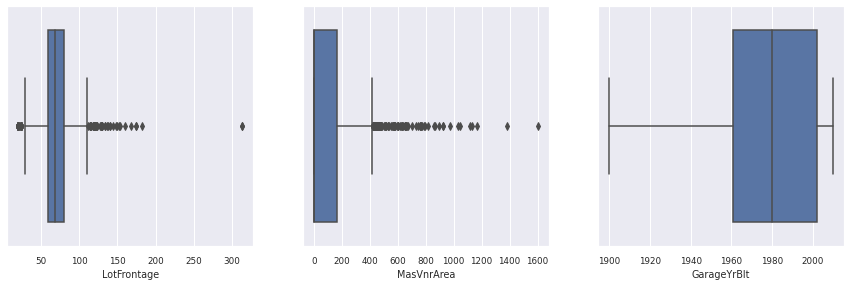

In [18]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(df_train["LotFrontage"]);
plt.subplot(3,3,2)
sns.boxplot(df_train["MasVnrArea"]);
plt.subplot(3,3,3)
sns.boxplot(df_train["GarageYrBlt"]);


In [19]:
df_train["LotFrontage"].fillna(df_train["LotFrontage"].median(),inplace=True)
df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].median(),inplace=True)
df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].mean(),inplace=True)

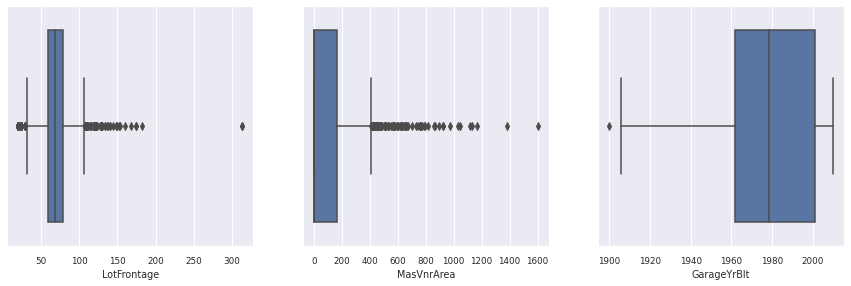

In [20]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(df_train["LotFrontage"]);
plt.subplot(3,3,2)
sns.boxplot(df_train["MasVnrArea"]);
plt.subplot(3,3,3)
sns.boxplot(df_train["GarageYrBlt"]);


### <font color ="red">Separating dependent and independent variable/s and creating dummy variables</font>

In [21]:
X = df_train.iloc[:,:-1]
y = df_train.iloc [:,-1] 

In [22]:
X=pd.get_dummies(X,drop_first=True)
X.shape

(1460, 232)

# <font color ="purple">Learning and Predicting Side</font>

#### <font color ="red">For this problem, Random Forest, Gradient Boosting and Deep Learning Processes will be used</font>

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

In [24]:
models = [RandomForestRegressor,GradientBoostingRegressor]

### <font color ="red">Defining a function for base prediction (without any parameter)</font>

In [25]:
def base_prediction(X,y,models):
    result = []
    results = pd.DataFrame(columns=["Models","RMSE"])
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
    for alg in models:
        model = alg().fit(X_train,y_train)
        predicted = model.predict(X_test)
        RMSE = np.sqrt(mean_squared_error(y_test,predicted))/100
        model_name = alg.__name__
        result = pd.DataFrame([[model_name,RMSE]],columns=["Models","RMSE"])
        results = results.append(result)
    return results
        

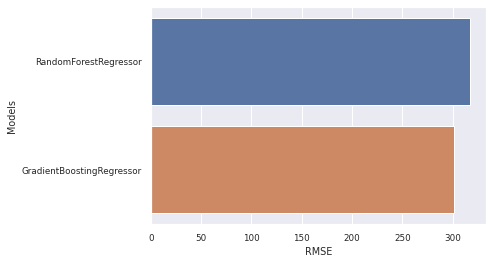

In [26]:
# Without parameter tuning, we got this result
results = base_prediction(X,y,models)
sns.barplot(x="RMSE",y="Models",data=results)
plt.xlabel("RMSE")
plt.show();

### <font color ="red">Tuned Prediction Side</font>

In [27]:
def tuned_prediction(X,y,models):
    result = []
    params={}
    results = pd.DataFrame(columns=["Models","RMSE"])
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75)
    for alg in models:
        if alg.__name__=="RandomForestRegressor":
            
            model = alg()
            params={"n_estimators":[200,500,1000],"min_samples_split":[2,10,20],"max_depth":[5,8],"max_features":[2,5]}
            cv = GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1).fit(X_train,y_train)
            
            model = alg(n_estimators = cv.best_params_["n_estimators"],
                       min_samples_split = cv.best_params_["min_samples_split"],
                       max_depth = cv.best_params_["max_depth"],
                       max_features = cv.best_params_["max_features"]).fit(X_train,y_train)
            predicted = model.predict(X_test)
            RMSE = np.sqrt(mean_squared_error(y_test,predicted))/100
            model_name = alg.__name__
            result = pd.DataFrame([[model_name,RMSE]],columns=["Models","RMSE"])
            results = results.append(result)
        if alg.__name__=="GradientBoostingRegressor":
            
            model = alg()
            params = {"n_estimators":[100,200],"max_depth":[3,5],"learning_rate":[0.1,0.01]}
            cv = GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1).fit(X_train,y_train)
            model = alg(n_estimators = cv.best_params_["n_estimators"],
                        max_depth = cv.best_params_["max_depth"],
                       learning_rate = cv.best_params_["learning_rate"]).fit(X_train,y_train)
            predicted = model.predict(X_test)
            RMSE = np.sqrt(mean_squared_error(y_test,predicted))/100
            model_name = alg.__name__
            result = pd.DataFrame([[model_name,RMSE]],columns=["Models","RMSE"])
            results = results.append(result)
            
            
            
    return results

In [28]:
results = tuned_prediction(X,y,models)

### <font color ="red">As we can see, Gradient Boosting is giving better results, so we use it for predicting</font>

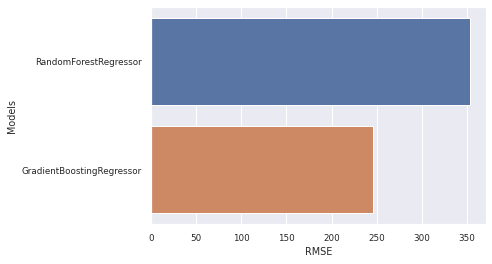

In [29]:
sns.barplot(x="RMSE",y="Models",data=results);

### <font color ="red">Visualising Variable Importances </font>

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
model = GradientBoostingRegressor()
params = {"n_estimators":[100,200],"max_depth":[3,5],"learning_rate":[0.1,0.01]}
cv = GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1).fit(X_train,y_train)
print(cv.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [31]:
# Final model
final_model = GradientBoostingRegressor(learning_rate=0.1,max_depth=3,n_estimators=200).fit(X_train,y_train)
predicted = final_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,predicted))/100)


221.71704060772078


### <font color ="purple">Shows the most 15 important variables for this prediction period.</font>

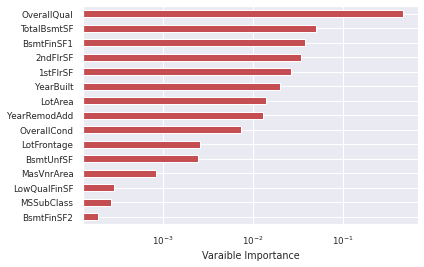

In [32]:

importance = pd.DataFrame({"importance":final_model.feature_importances_[:15]},index=X_train.columns[:15])

a=importance.sort_values(by="importance",ascending=True).plot(kind="barh",color="r")
a.set_xscale("log")
plt.xlabel("Varaible Importance")
plt.gca().legend_=None

### <font color ="purple">As a last step, converting predicted values to integer, and saving it as submission.csv</font>

In [33]:
newdf = pd.DataFrame({"SalePrice":predicted},index=y_test.index)
newdf = newdf.astype("int64")
newdf["Id"]=list(y_test.index)

In [34]:
newdf

,SalePrice,Id
1045,158018,1045
194,127350,194
1214,127551,1214
857,159331,857
396,127467,396
...,...,...
1405,290463,1405
501,211099,501
170,127310,170
245,212734,245


In [35]:
cols = newdf.columns.tolist()
cols

['SalePrice', 'Id']

In [36]:
cols = cols[-1:]+cols[:-1]
newdf = newdf[cols]

In [37]:
newdf.reset_index(drop=True)

,Id,SalePrice
0,1045,158018
1,194,127350
2,1214,127551
3,857,159331
4,396,127467
...,...,...
360,1405,290463
361,501,211099
362,170,127310
363,245,212734


In [38]:
newdf.to_csv("submission.csv",index=False)